<a href="https://colab.research.google.com/github/moonjunseok/moon-python/blob/main/%EC%8B%AC%ED%98%88%EA%B4%80_%EC%A7%88%ED%99%98_%EB%8D%B0%EC%9D%B4%ED%84%B0_(0_73).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import sklearn

In [ ]:
data=pd.read_csv('/content/cardio_train.csv',sep=';')

#심혈관 질환 데이터

*  id 
*  age  (in days)
*  gender (1-women, 2 - men)
*  height  (cm)
*  weight  (kg)
*  ap_hi(수축기 혈압)
*  ap_lo(이완기 혈압)
*  cholesterol(콜레스테롤) 
     1: normal, 2: above normal, 
     3: well above normal
*  gluc(포도당)
     1: normal, 2: above normal, 
     3: well above normal
*  smoke(담배) (1 - 피고 , 0 - 안피고)
*  alco  (binary feature)
*  active 0 과 1  (binary feature)
*  cardio  0 과 1  (target variable)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [ ]:
data.isna().sum()  #결측값 없음

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [ ]:
data_1=data.copy()  # data_1에 카피를 한다.

In [ ]:
data_1=data_1.drop('id',axis=1) #의미 없는 id는 삭제한다.

키와 몸무게는 

BMI지수(체질량지수)= 몸무게(kg)/신장x100(cm)^2 이걸로 대체

In [ ]:
data_1['BMI'] = data_1['weight'] / (data_1['height']/100)**2

In [ ]:
data_1=data_1.drop('height',axis=1) # 키 칼럼을 삭제

In [ ]:
data_1=data_1.drop('weight',axis=1) # 몸무게 칼럼을 삭제

BMI지수를 범주화 시켜준다.

미국기준(질병통제예방센터)

* 18.5 미만 : 저체중
* 18.5 ~ 25 미만 : 정상
* 25 ~ 30 미만 : 과체중
* 30 이상 : 비만

In [ ]:
data_1.loc[data_1['BMI'] < 18.5, 'BMI_bin'] = 1
data_1.loc[(data_1['BMI'] >= 18.5) & (data_1['BMI'] < 25), 'BMI_bin'] = 2
data_1.loc[(data_1['BMI'] >= 25) & (data_1['BMI'] < 30), 'BMI_bin'] = 3
data_1.loc[data_1['BMI'] >= 30, 'BMI_bin'] = 4

In [ ]:
data_1=data_1.drop('BMI',axis=1)  #bmi지수를 범주화했으니 bmi는 삭제

나이는 일 단위를 연 단위로 바꿔준다.

In [ ]:
def age(x) :
    x = x/365 
    return int(x)

In [ ]:
#원본 데이터의 나이를 연도별로 정한것
data['age_year'] = data['age'].apply(age)

In [ ]:
data_1['age_year'] = data_1['age'].apply(age)

In [ ]:
data_1=data_1.drop('age',axis=1)

나이를 범주화 시켜준다.

In [ ]:
data_1.loc[data_1['age_year']< 40 , 'age_bin']=1
data_1.loc[(data_1['age_year']>=40) & (data_1['age_year']< 50), 'age_bin']=2
data_1.loc[(data_1['age_year']>=50) & (data_1['age_year']< 60), 'age_bin']=3
data_1.loc[data_1['age_year']>=60, 'age_bin'] =4

In [ ]:
data_1=data_1.drop('age_year',axis=1)

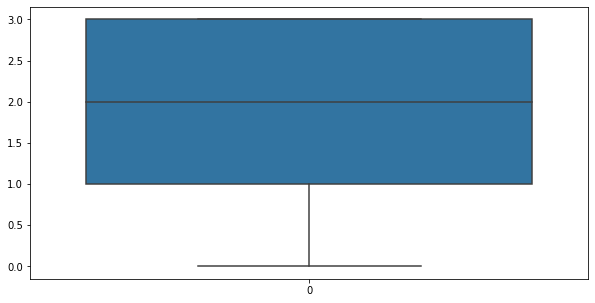

In [ ]:
fig, ax = plt.subplots(figsize = (10, 5))
sns.boxplot(data = data_1['BMI_bin'])
plt.show()  #이건 어떻게 해석 할 수 있을지?

**기초통계 - 시각화**

In [ ]:
data_1['cardio'].value_counts()  

0    35021
1    34979
Name: cardio, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


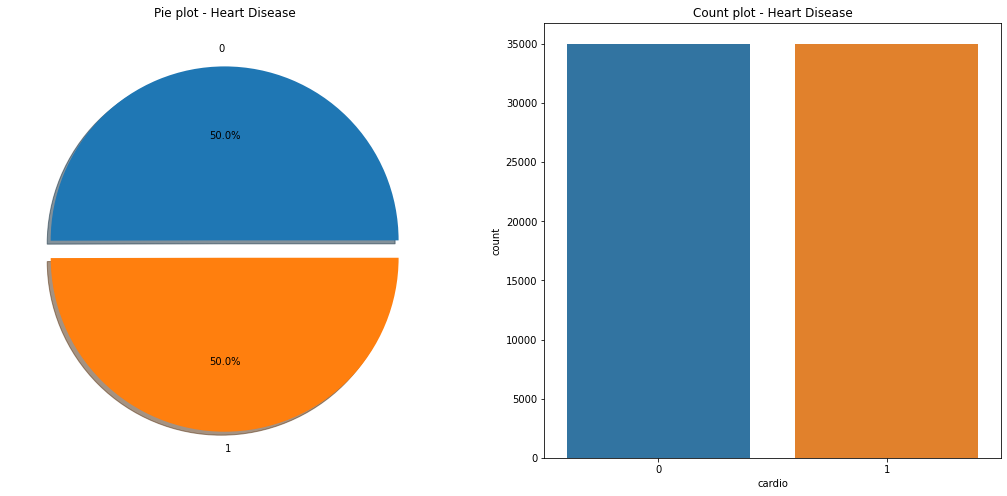

In [ ]:
# 심장병에 걸린사람과 안걸린 사람

f, ax = plt.subplots(1, 2, figsize=(18, 8))
 
data_1["cardio"].value_counts().plot.pie(ax=ax[0], shadow=True, explode=[0, 0.1], autopct='%1.1f%%')
ax[0].set_title('Pie plot - Heart Disease')
ax[0].set_ylabel('')
sns.countplot('cardio', data=data_1, ax=ax[1])
ax[1].set_title('Count plot - Heart Disease')
 
plt.show()

심장병에 걸린 사람   : 34979명

심장병에 안걸린 사람 : 35021명

In [ ]:
def bar_chart(feature):
  yes = data_1[data_1['cardio'] ==1][feature].value_counts() # 심장병 걸린 카운트
  no = data_1[data_1['cardio'] ==0][feature].value_counts() #  심장병 안걸린 카운트
  df = pd.DataFrame([yes,no]) #[걸린,안걸린]를 dataFrame
  df.index = ['yes','no'] # index화
  df.plot(kind = 'bar',stacked = True, figsize = (10,5)) #그림을 그림

In [ ]:
# 나이 * 심장병

data_1['age_bin'].value_counts()  

3.0    35541
2.0    19625
4.0    13050
1.0     1784
Name: age_bin, dtype: int64

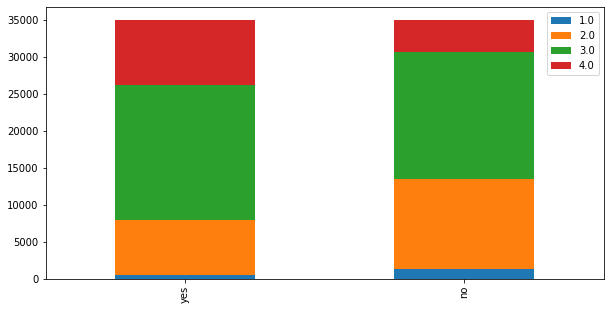

In [ ]:
bar_chart('age_bin') 

1: 40 미만

2: 40 이상 50 미만

3: 50 이상 60 미만

4: 60 이상

나이가 많을수록 심장병에 걸리는 비율이 더 많고 

나이가 적을수록 심장 병에 걸리는 비율이 낮다.


In [ ]:
# 성별 * 심장병

data_1['gender'].value_counts()  

1    45530
2    24470
Name: gender, dtype: int64

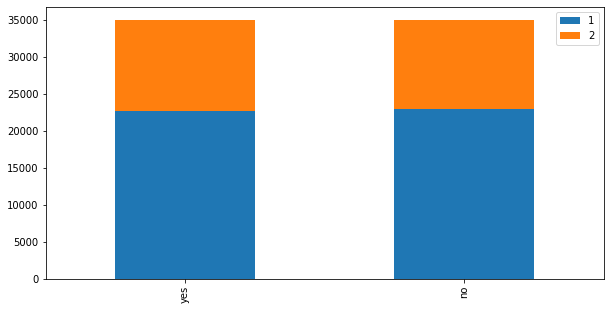

In [ ]:
bar_chart('gender') 

1 : 여성 , 2 : 남성

남성 여성 둘다 걸릴 확률과 안걸릴 확률이 비슷하다.

In [ ]:
# BMI * 심장병

data_1['BMI_bin'].value_counts()  

2.0    25790
3.0    25086
4.0    18474
1.0      650
Name: BMI_bin, dtype: int64

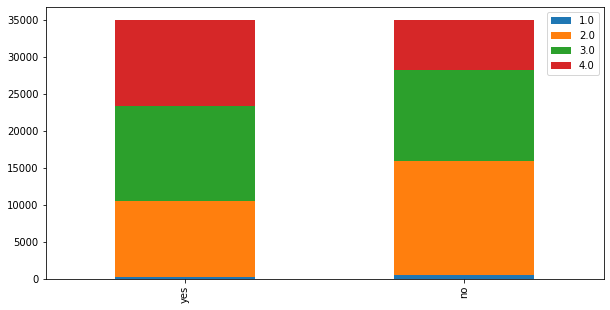

In [ ]:
bar_chart('BMI_bin') 

1 : BMI지수 18.5 미만

2 : BMI지수 18.5 이상 25 미만 

3 : BMI지수 25 이상 30 미만

4 : BMI지수 30 이상

BMI지수가 높을수록 심장병에 걸릴 확률이 높고, BMI지수가 낮을수록 심장병에 걸릴 확률이 낮다.


In [ ]:
# 성별 * 콜레스테롤

data_1['gluc'].value_counts()  

1    59479
3     5331
2     5190
Name: gluc, dtype: int64

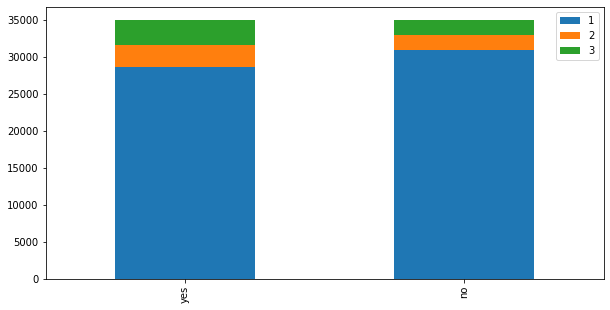

In [ ]:
bar_chart('gluc') 

포도당

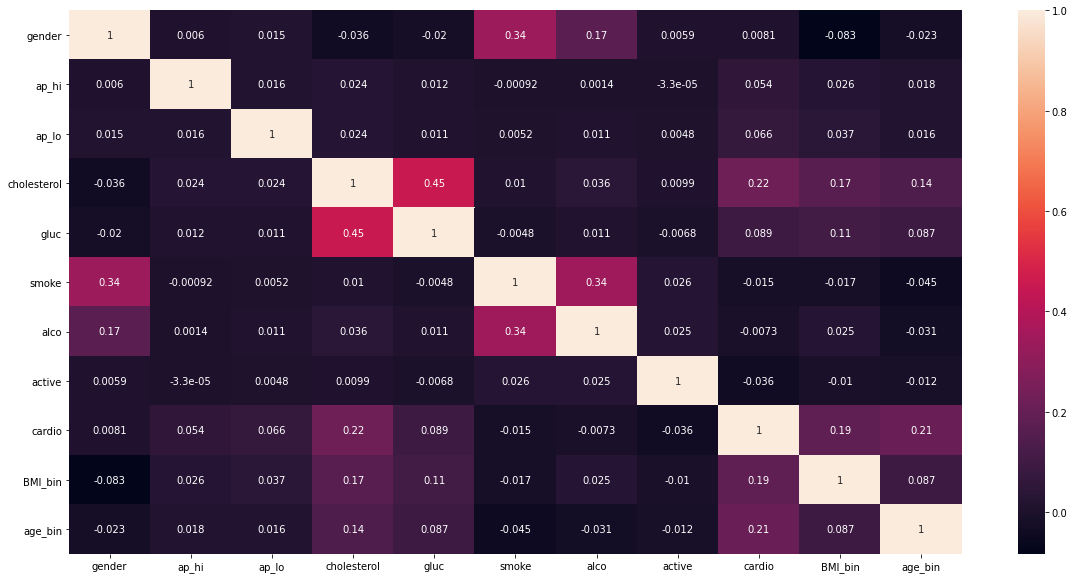

In [ ]:
# heatmap을 통한 변수들간의 상관관계

corr = data_1.corr()
fig, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(corr, annot = True)
plt.show()

키와 성별이 0.5의 상관계수를 가지고

포도당과 콜레스테롤이 0.45의 상관계수를 가지고 있는 것을 알 수 있다.

In [ ]:
train = data_1.drop('cardio', axis = 1)
test = data_1['cardio']

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size = 0.3, random_state =42)
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)
print(gbc.score(X_train, y_train))
print(gbc.score(X_test, y_test))

0.7353877551020408
0.7340476190476191
